In [2]:

pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import math
import geocoder
import requests
%matplotlib inline
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize

In [45]:
count=0
videoFile = "Accidents.mp4"
cap=cv2.VideoCapture(videoFile)
frameRate=cap.get(5)
x=1
while(cap.isOpened()):
    frameId=cap.get(1)
    ret,frame=cap.read()
    if(ret!=True):
        break
    if(frameId % math.floor(frameRate)==0):
        filename="%d.jpg" % count;count+=1;
        cv2.imwrite(filename,frame)
cap.release()
print("Done!")

Done!


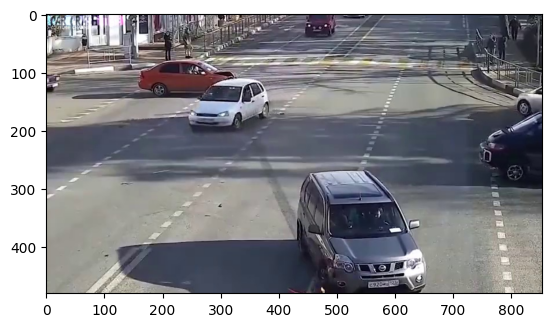

In [2]:
img=plt.imread('14.jpg')
plt.imshow(img)

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('mapping.csv')
data.tail()


,Image_ID,Class
217,217.jpg,1
218,218.jpg,1
219,219.jpg,1
220,220.jpg,1
221,221.jpg,1


In [6]:
X=[]
for img_name in data.Image_ID:
    img=plt.imread('' + img_name)
    X.append(img)
X=np.array(X)

In [5]:
from tensorflow.keras.utils import to_categorical

In [7]:
y=data.Class
dummy_y=to_categorical(y)
dummy_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [8]:
image = []
for i in range(0,X.shape[0]):
    a=resize(X[i],preserve_range=True,output_shape=(224,224)).astype(int)
    image.append(a)
X=np.array(image)

In [9]:
X

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [54]:
from keras.applications.vgg16 import preprocess_input
X=preprocess_input(X,data_format=None)

In [55]:
X

array([[[[-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         ...,
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02]],

        [[-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         ...,
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02]],

        [[-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         ...,
         [-1.0393900e+02, -1.1677900e+02, -1.2368000e+02],
         [

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid=train_test_split(X,dummy_y,test_size=0.3,random_state=36)

In [11]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [12]:
base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [13]:
X_train=base_model.predict(X_train)
X_valid=base_model.predict(X_valid)
X_train.shape,X_valid.shape

3/3 [==============================] - 11s 3s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [16]:
X_train = X_train.reshape(155,7*7*512)
X_valid = X_valid.reshape(67,7*7*512)

In [17]:
train = X_train/X_train.max()
X_valid = X_valid/X_train.max()

In [18]:
train

array([[0.02631229, 0.        , 0.        , ..., 0.        , 0.20376626,
        0.        ],
       [0.0728259 , 0.        , 0.        , ..., 0.        , 0.23445855,
        0.        ],
       [0.00880207, 0.        , 0.        , ..., 0.        , 0.02796765,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.02437032,
        0.        ],
       [0.09142836, 0.11870401, 0.        , ..., 0.        , 0.00624319,
        0.01212355],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05682718,
        0.        ]], dtype=float32)

In [19]:
model = Sequential()
model.add(InputLayer((7*7*512,)))
model.add(Dense(units=1024,activation='sigmoid'))
model.add(Dense(2,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25693186 (98.01 MB)
Trainable params: 25693186 (98.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [23]:
history = model.fit(train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
5/5 [==============================] - 2s 411ms/step - loss: 0.6379 - accuracy: 0.6194 - val_loss: 0.6931 - val_accuracy: 0.4179
Epoch 2/50
5/5 [==============================] - 2s 369ms/step - loss: 0.3082 - accuracy: 0.8452 - val_loss: 0.7940 - val_accuracy: 0.4179
Epoch 3/50
5/5 [==============================] - 2s 372ms/step - loss: 0.1808 - accuracy: 0.9613 - val_loss: 0.7232 - val_accuracy: 0.4179
Epoch 4/50
5/5 [==============================] - 2s 379ms/step - loss: 0.1005 - accuracy: 0.9935 - val_loss: 0.7769 - val_accuracy: 0.4179
Epoch 5/50
5/5 [==============================] - 2s 352ms/step - loss: 0.0649 - accuracy: 0.9935 - val_loss: 0.8516 - val_accuracy: 0.4179
Epoch 6/50
5/5 [==============================] - 2s 344ms/step - loss: 0.0380 - accuracy: 1.0000 - val_loss: 0.8178 - val_accuracy: 0.4179
Epoch 7/50
5/5 [==============================] - 2s 341ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 0.8937 - val_accuracy: 0.4179
Epoch 8/50
5/5 [====

In [80]:
loss, accuracy = model.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_valid,y_valid, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8955


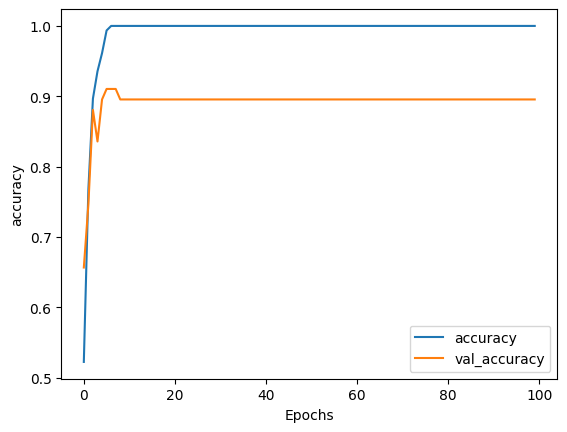

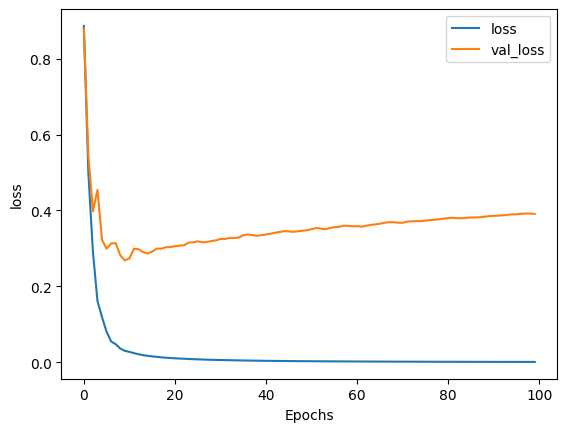

In [81]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

In [82]:
from keras.models import load_model

In [83]:
model.save('AccidentModel.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('AccidentModel.h5')
savedModel.summary()

C:\Users\harry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_3 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25693186 (98.01 MB)
Trainable params: 25693186 (98.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
import cv2
import math
import csv

count = 0
videoFile = "outputt.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)

# List to store the filenames
file_list = [["Image_ID"]]

while cap.isOpened():
    frameId = cap.get(1)
    ret, frame = cap.read()
    if not ret:
        break
    if frameId % math.floor(frameRate) == 0:
        filename = f"output{count}.jpg"
        file_list.append([filename])
        cv2.imwrite(filename, frame)
        count += 1

cap.release()
print("Done!")

# Writing filenames to a CSV file
csv_file = "output.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(file_list)

print(f"{csv_file} created successfully with the filenames.")


Done!
output.csv created successfully with the filenames.


In [85]:
test = pd.read_csv('output.csv')

In [86]:
test.head()


,Image_ID
0,output0.jpg
1,output1.jpg
2,output2.jpg
3,output3.jpg
4,output4.jpg


In [87]:
test.tail()

,Image_ID
8,output8.jpg
9,output9.jpg
10,output10.jpg
11,output11.jpg
12,output12.jpg


In [88]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [89]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)
    

In [90]:
test_image = preprocess_input(test_image,data_format=None)
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 2s 2s/step


(13, 7, 7, 512)

In [91]:
test_image = test_image.reshape(13,7*7*512)
test_image = test_image/test_image.max()

In [92]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 80ms/step


In [93]:

ran=predictions.size/2

ran=int(ran)

In [94]:
for i in range(0,ran):
    if predictions[i][0]< predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")

No Accident
No Accident
Accident
Accident
No Accident
No Accident
No Accident
No Accident
No Accident
No Accident
No Accident
No Accident
No Accident


In [95]:
geoLoc = Nominatim(user_agent="GetLoc")
locname = geoLoc.reverse("12.987151,79.973191")
dir_path = r'C:\Users\harry\MINI PROJECT\Implementation'
account_sid = 'AC10649663af1ca4ea1befc9507fc9e9f9'
auth_token = 'dcb7593c942a1b4f035f09cc162a4cc3'
client = Client(account_sid,auth_token)
                

In [98]:
cap = cv2.VideoCapture(r'C:\Users\harry\MINI PROJECT\Implementation\output1.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/11)%ran][0]<predictions[int(i/11)%ran][1]:
            predict = "No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                    predict,
                    (50,50),
                    font,1,
                    (0,255,255),
                    3,
                    cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(body = "Accident detected at " + locname.address + ". Coordinates: "+ str(locname.latitude) + "," + str(locname.longitude) , from_ = "+16562188107",  to="+919003073369")
    print("Alert message sent")
cap.release()
cv2.destroyAllWindows()


Alert message sent
